# นายชินวงศ์ ตั้งจริงใจ 6110401072

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

## 1

In [2]:
df = pd.read_csv('players.csv')

In [3]:
df = df.loc[:,'surname':'saves']

In [4]:
df = df.set_index(['surname','team','position'])

In [5]:
df = df[['shots','passes','tackles','saves']].div(df['minutes'],axis=0)

In [6]:
df = df.reset_index()

In [7]:
df['position2'] = pd.Categorical(df.position,categories=['goalkeeper','defender','midfielder','forward'],ordered=True)

In [8]:
df = df.drop(columns='position')

In [9]:
df.columns = ['surname','team','shots','passes','tackles','saves','position']

In [10]:
df.sort_values(by='position')

,surname,team,shots,passes,tackles,saves,position
330,Stekelenburg,Netherlands,0.000000,0.275926,0.000000,0.027778,goalkeeper
204,Kingson,Ghana,0.000000,0.205882,0.001961,0.039216,goalkeeper
260,Marchetti,Italy,0.000000,0.093333,0.000000,0.004444,goalkeeper
54,Schwarzer,Australia,0.000000,0.188889,0.000000,0.048148,goalkeeper
385,Ri Myong-Guk,North Korea,0.000000,0.170370,0.000000,0.070370,goalkeeper
...,...,...,...,...,...,...,...
444,Zigic,Serbia,0.022026,0.286344,0.008811,0.000000,forward
181,Klose,Germany,0.030899,0.233146,0.011236,0.000000,forward
180,Kiessling,Germany,0.000000,0.714286,0.000000,0.000000,forward
200,Gyan,Ghana,0.053892,0.301397,0.001996,0.000000,forward


## 2

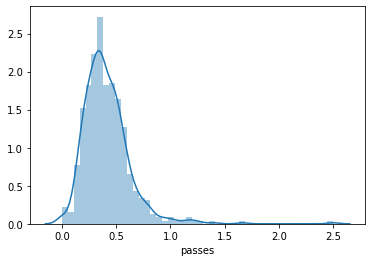

In [11]:
sns.distplot(df.passes)

## 3

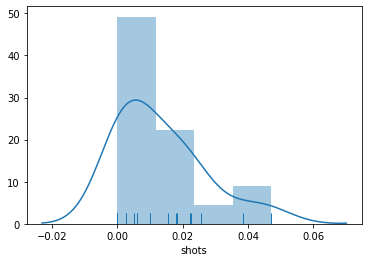

In [16]:
usa = df.loc[df['team']=='USA'].sort_values(by='position')
sns.distplot(usa.shots,rug=True,hist=True,bins=4)

## 4

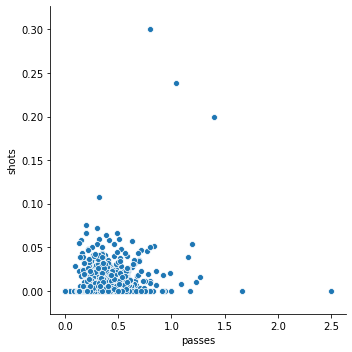

In [19]:
sns.relplot(data=df,x='passes',y='shots')

## 5

In [21]:
nt = ['Brazil','Spain','USA']

In [24]:
nt2 = df.loc[df.team.isin(nt)]

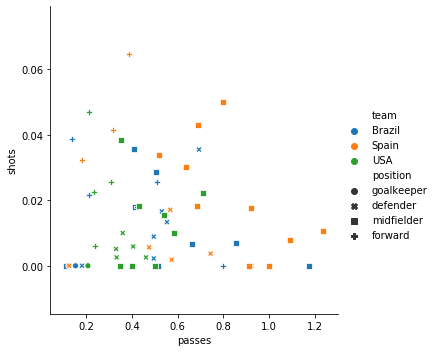

In [25]:
sns.relplot(data=nt2,x='passes',y='shots',hue='team',style='position')

## 6

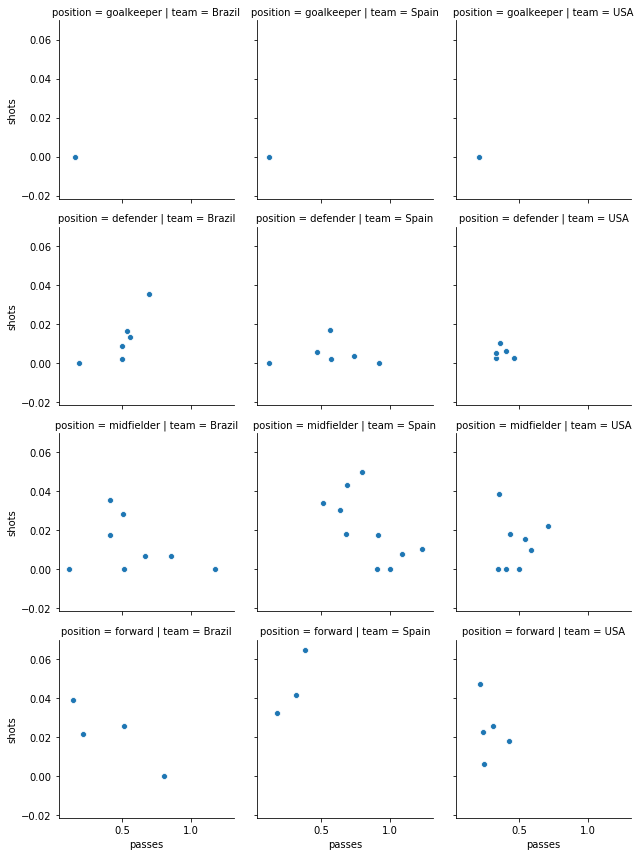

In [26]:
sns.relplot(data=nt2,x='passes',y='shots',col='team',row='position',height=3)

## 7

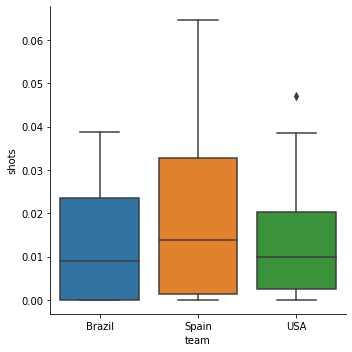

In [28]:
sns.catplot(data=nt2,x='team',y='shots',kind='box')

## 8

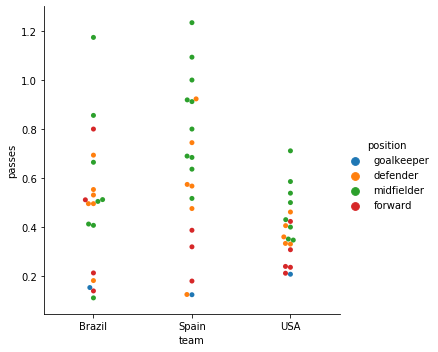

In [29]:
sns.catplot(data=nt2,y='passes',x='team',hue='position',kind='swarm')

## 9

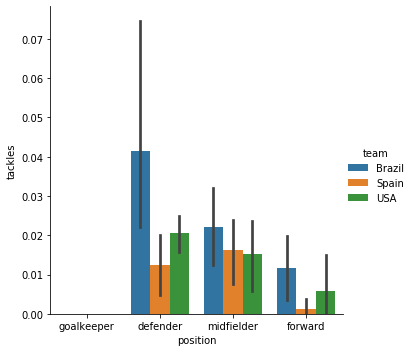

In [30]:
sns.catplot(data=nt2,x='position',y='tackles',hue='team',kind='bar',height=5)

## 10

In [31]:
new = ['Algeria','Brazil','England','France','Japan','South Korea','Spain','USA']

In [34]:
sum = df.groupby('team').sum()

In [35]:
sum = sum.reset_index()

In [37]:
sum = sum.loc[sum['team'].isin(new),['team','passes','shots']]

In [38]:
sum

,team,passes,shots
0,Algeria,6.798598,0.287468
3,Brazil,9.409405,0.257860
7,England,8.034676,0.258509
8,France,7.288387,0.299354
15,Japan,6.643104,0.131144
27,South Korea,5.916720,0.178927
28,Spain,12.905446,0.378533
30,USA,7.381349,0.249598


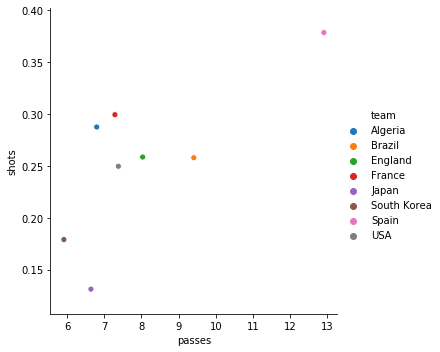

In [39]:
sns.relplot(data=sum,x='passes',y='shots',hue='team')

## 11

In [42]:
usa2 = df.loc[df['team']=='USA']
brazil = df.loc[df['team']=='Brazil']
spain = df.loc[df['team']=='Spain']

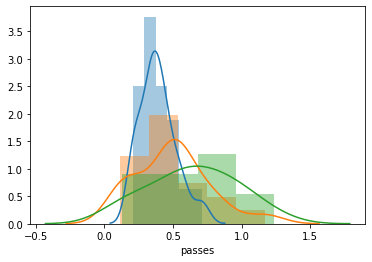

In [43]:
sns.distplot(usa2.passes)
sns.distplot(brazil.passes)
sns.distplot(spain.passes)